<a href="https://colab.research.google.com/github/eugeinga/CODER-DataScienceI/blob/main/ProyectoDS_ParteI_INGARAMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo CODER Amarillo](https://github.com/eugeinga/CODER-DataScienceI/raw/main/Logo%20CODER%20Amarillo.jpg)

# **Data Science I - TP Pre-entrega**
* **Comisión:** 61600
* **Profesor:** Leonardo Ferreira Da Silva
* **Tutor:** Lucila Adanchú
* **Estudiante:** Ma. Eugenia Ingaramo



## **TEMA: Análisis de la calidad de vinos de Portugal**

##### Mediante este proyecto se pretende analizar los datos vinculados a la calidad de los vinos de Portugal. Para ello, se plantearán distintas hipótesis que serán evaluadas mediante análisis estadístico. Se espera, además, identificar patrones y/o tendencias que pudieran predecir la calificación promedio de un vino.

### **Acerca del set de datos**

##### **Wine Quality Data Set (Red & White Wine):** <https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine>

##### Este conjunto de datos contiene registros relacionados con las variedades tinto y blanco del vino Vinho Verde portugués. Contiene información de 1599 muestras de vino tinto y 4898 muestras de vino blanco.
##### Las variables de entrada en el conjunto de datos consisten en el tipo de vino (tinto o blanco) y métricas de pruebas objetivas (por ejemplo, niveles de acidez, valores de PH, ABV, etc.), mientras que la variable objetivo/salida es una puntuación numérica basada en datos sensoriales (de al menos 3 evaluaciones realizadas por expertos en vino). Cada experto calificó la calidad del vino entre 0 (muy mala) y 10 (muy excelente).
##### Por cuestiones de privacidad y logística, no hay datos sobre tipos de uva, marca de vino y precio de venta del vino.

### **Hipótesis**

Se establecen las siguientes hipótesis:
* La acidez fija y la acidez volátil tienen una correlación significativa con la calidad del vino.
* Niveles altos de dióxido de azufre (libre y total) afectan negativamente la calidad del vino.
* Las características químicas que más influyen en la calidad varían entre vinos blancos y tintos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid", palette="pastel") # Estilo de seaborn

## **PREPROCESAMIENTO DE DATOS**

### **Adquisición de Datos**

In [2]:
# Lectura del dataset

#url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceI/main/wine-quality-white-and-red.csv"
url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceI/main/winequalityN.csv"
df=pd.read_csv(url,sep=',',header=0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **Variables bajo estudio**


| VARIABLE             | DECRIPCION              | MIN     | MAX       | RANGO TIPICO  |
|----------------------|-------------------------|---------|-----------|---------------|
| **type** | Tipo de vino |   |   | Blanco /Negro |
| **fixed acidity**        | Acidez fija             | 4.0 g/L | 16.0 g/L  | 4.0 - 9.0 g/L |
| **volatile acidity**     | Acidez volátil          | 0.1 g/L | 1.6 g/L   | 0.2 - 1.0 g/L |
| **citric acid** | Acido cítrico | 0.0 g/L  | 1.6 mg/L  | 0 - 0.5 g/L |
| **residual sugar** | Azúcar residual | 0.1 g/L  | 45 g/L  | 0.9 - 15.5 mg/L |
| **chlorides** | Cloruros | 0.009 g/L  | 0.6 g/L  | 0.01 - 0.2 mg/L |
| **free sulful dioxide** | Dioxido de azufre libre | 1 mg/L  | 70 mg/L  | 10 - 50 mg/L |
| **total sulful dioxide** | Dioxido de azufre total | 6 mg/L  | 350 mg/L  | 50 - 150 mg/L |
| **density** | Densidad | 0.90 g/cm³  | 1.01 g/cm³  | 0.99 - 1.00 g/cm³ |
| **pH** | pH | 2.75  | 4.00  | 3.00 - 4.00 |
| **sulphates** | Sulfatos | 0.3 g/L  | 2.0 g/L  | 0.3 - 0.6 g/L |
| **alcohol** | Alcohol | 8 %  | 15 %  | 11 - 14 % |
| **quality** | Calidad | 1  | 10  | 1 - 10 |




* **Acidez fija:** La acidez fija es responsable del sabor ácido del vino. Los vinos con una acidez fija en el rango rípico suelen tener un sabor fresco y equilibrado. Los valores más altos son más comunes en vinos blancos y espumosos.
* **Acidez volátil:** Niveles altos de acidez volátil pueden dar un sabor avinagrado al vino, lo cual generalmente es un defecto.
* **Ácido cítrico:**	Es un ácido que agrega frescura y un sabor afrutado al vino. Su presencia en pequeñas cantidades es deseable.
* **Azúcar residual:**	Es el azúcar que queda en el vino después de la fermentación. Los vinos con menos azúcar residual son secos, mientras que los vinos con más azúcar residual son dulces.
* **Cloruros:**	Se refiere al contenido de sal en el vino, que puede influir en su sabor y cuerpo. Niveles altos pueden dar un sabor salado, lo que generalmente es indeseable.
* **Dióxido de azufre libre:**	Es el dióxido de azufre que no está ligado a otros compuestos en el vino y actúa como un conservante, ayudando a prevenir la oxidación y el crecimiento microbiano. Los vinos blancos y rosados suelen requerir más dióxido de azufre libre que los tintos.
* **Dióxido de azufre total:**	Es la suma del dióxido de azufre libre y el combinado. Un nivel adecuado es importante para la conservación del vino, pero niveles demasiado altos pueden causar un sabor fuerte y desagradable. Los valores máximos permitidos varían según la legislación de cada país, generalmente se permite hasta 200 mg/L para vinos tintos y hasta 350 mg/L para vinos blancos y rosados.
* **Densidad:**	Se refiere a la relación entre la masa y el volumen del vino. Está estrechamente relacionada con el contenido de azúcar y alcohol; un vino más dulce o con más alcohol generalmente tendrá mayor densidad. Los vinos secos tienden a estar más cerca del rango inferior, mientras que los vinos dulces están en el extremo superior.
* **pH:**	Mide la acidez o alcalinidad del vino. Un pH bajo (común en vinos blancos) indica alta acidez, lo que contribuye a la frescura y estabilidad del vino.
* **Sulfatos:**	Los sulfatos, como el sulfato de potasio, son aditivos que pueden usarse para estabilizar el vino y mejorar su claridad. En cantidades excesivas pueden influir negativamente en el sabor y la sensación en boca.
* **Alcohol:**	Indica el porcentaje de alcohol por volumen en el vino. Afecta el cuerpo, el sabor y la percepción general del vino. Un vino con más alcohol puede parecer más cálido y robusto. Los vinos de mesa suelen estar en el rango de 11% a 14%.
* **Calidad:**	Este es un valor subjetivo basado en una evaluación sensorial y puede variar ampliamente según el catador y el tipo de vino. Un vino de alta calidad generalmente estará en el rango de 7 a 10.

In [3]:
# Información de resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Dimensiones del dataset [filas, columnas]
df.shape

(6497, 13)

El dataset bajo estudio cuenta con 6497 filas y 13 columnas de las cuales 12 corresponden a variables independientes a analizar y 1 a la variable dependiente u objetivo.

In [5]:
# A fin de poder operar con los valores numéricos de todas las columnas convierto todas las columnas que no sean numéricas
# De esta manera garantizo que cualquier columna que pueda ser convertida a un tipo de dato numérico lo sea.

df = df.apply(pd.to_numeric, errors='coerce')
#df['type'] = df['type'].astype('category')
#df['quality'] = df['quality'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  0 non-null      float64
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


In [6]:
# Cardinalidad de las variables

cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)})
cardinalidad

,Cantidad,Porcentaje
type,0,0.000000
fixed acidity,106,1.631522
volatile acidity,187,2.878252
citric acid,89,1.369863
residual sugar,316,4.863783
chlorides,214,3.293828
free sulfur dioxide,135,2.077882
total sulfur dioxide,276,4.248115
density,998,15.360936
pH,108,1.662306


### **Estadística Descriptiva**

In [7]:
df.describe().round(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,0.0,6487.00,6489.00,6494.00,6495.00,6495.00,6497.00,6497.00,6497.00,6488.00,6493.00,6497.00,6497.00
mean,NaN,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,NaN,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,NaN,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,NaN,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,NaN,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,NaN,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,NaN,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [8]:
print("Dimensiones del dataset original: ", df.shape)
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
print("Dimensiones del dataset sin filas duplicadas: ", df.shape)

Dimensiones del dataset original:  (6497, 13)
Dimensiones del dataset sin filas duplicadas:  (5327, 13)


##### El dataset tiene 1170 filas duplicadas que son eliminadas. El dataset resultante posee 5327 filas y 13 columnas.

## **Manejo de valores faltantes**


##### Contabilizo los datos nulos por columnas

In [9]:
# Contabilizo los datos nulos/faltantes por columna.

#print(df.isnull().sum())
print(df.isna().sum())

type                    5327
fixed acidity             10
volatile acidity           8
citric acid                3
residual sugar             2
chlorides                  2
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         9
sulphates                  4
alcohol                    0
quality                    0
dtype: int64


##### Elimino las filas con más de 2 valores NAN

In [10]:
# Elimino las filas con más de 2 valores NAN

df.dropna(thresh=2)
df.shape

(5327, 13)

##### Reemplazo los datos faltantes con la media de cada columna

In [11]:
# Reemplazo los datos faltantes con la media

df.fillna(df.mean(), inplace=True)
print(df.isna().sum())

type                    5327
fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
dtype: int64


## **Valores sospechosos**

##### Se consideran valores sospechosos los siguientes:
* los valores en cero (a excepción de 'ácido cítrico'),
* los valores negativos (aunque según los datos estadísticos no hay columnas con valores mínimos negativos).

In [12]:
# Se contabilizan los datos que son menores a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

valoresnulos = (df[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] <= 0).sum()
print(valoresnulos)

fixed acidity           0
volatile acidity        0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [13]:
# Calculo el coeficiente de variación (CV) de las distintas columnas a fin de determinar la dispersión de los conjunto de datos respecto a la media.
# Si el CV es <= 30% se dice que los datos son relativamente homogéneos.

encabezados = df.columns.values

for i in range(len(encabezados)):
  coefVar = (df[encabezados[i]].std() / df[encabezados[i]].mean()) * 100
  print(f"CV {encabezados[i]}: {coefVar.round(2)}")


CV type: nan
CV fixed acidity: 18.26
CV volatile acidity: 48.85
CV citric acid: 46.14
CV residual sugar: 89.09
CV chlorides: 65.0
CV free sulfur dioxide: 59.28
CV total sulfur dioxide: 49.73
CV density: 0.3
CV pH: 4.97
CV sulphates: 28.07
CV alcohol: 11.24
CV quality: 15.18


In [14]:
df.nunique()

,0
type,0
fixed acidity,107
volatile acidity,188
citric acid,90
residual sugar,317
chlorides,215
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,109


## **Análisis de variables categóricas**

In [15]:
# Cambio el tipo de variable de "type" y "quality" para que sea considerada una variable categórica

url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceI/main/winequalityN.csv"
df2=pd.read_csv(url,sep=',',header=0)

df2['type'] = df2['type'].astype('category')
df2['quality'] = df2['quality'].astype('category')
df2.dtypes


,0
type,category
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64


In [16]:
df2.describe(include='category').round(2)

,type,quality
count,6497,6497
unique,2,7
top,white,6
freq,4898,2836


In [17]:
# Cuento la frecuencia de cada categoría

df2['quality'].value_counts().sort_index()

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


In [18]:
# Calculo la proporción de cada frecuencia

(df2['quality'].value_counts(normalize=True) * 100).round(2).sort_index()

,proportion
quality,
3,0.46
4,3.32
5,32.91
6,43.65
7,16.61
8,2.97
9,0.08


In [19]:
# Agrupo los datos por tipo y calidad

df2Agrupado = df2.groupby(['type', 'quality'], observed=False).size().reset_index(name='counts')
df2Agrupado

,type,quality,counts
0,red,3,10
1,red,4,53
2,red,5,681
3,red,6,638
4,red,7,199
5,red,8,18
6,red,9,0
7,white,3,20
8,white,4,163
9,white,5,1457


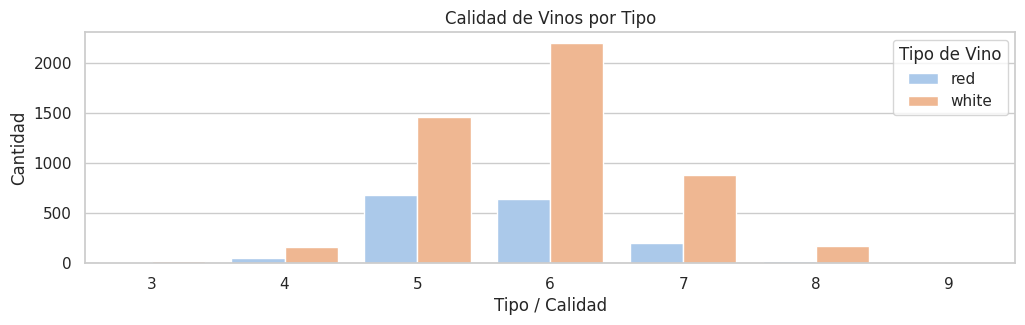

In [20]:
plt.figure(figsize=(12,3))
sns.barplot(x='quality', y='counts', hue='type', data=df2Agrupado)
#sns.barplot(x='type', y='counts', hue='quality', data=df2Agrupado)

plt.title('Calidad de Vinos por Tipo')
plt.xlabel('Tipo / Calidad')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Vino')
plt.show()

### **Análisis de Outliers**

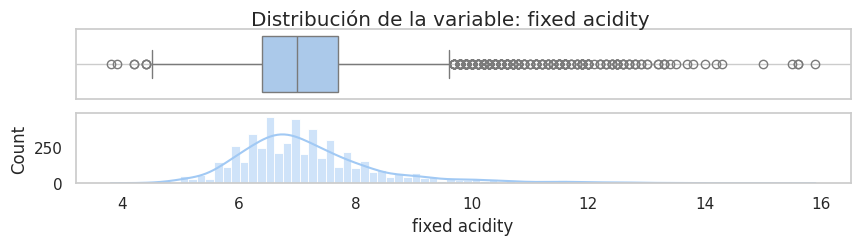

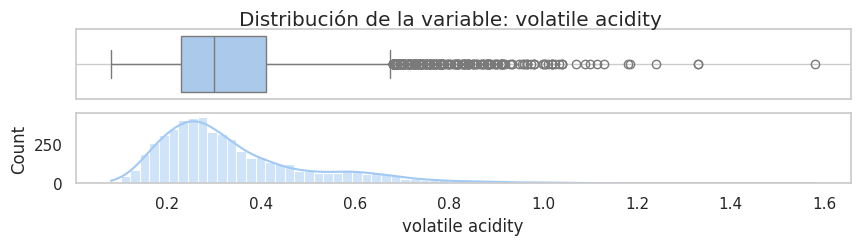

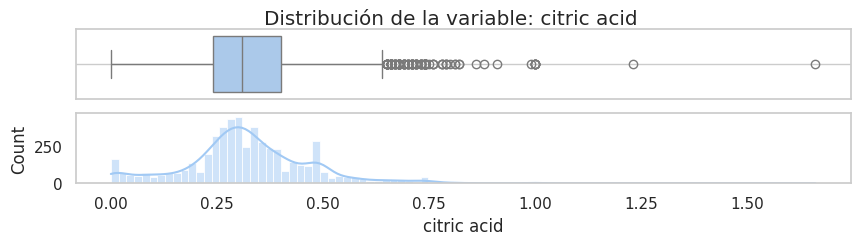

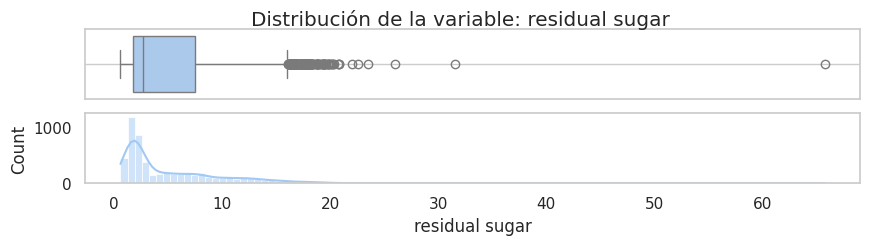

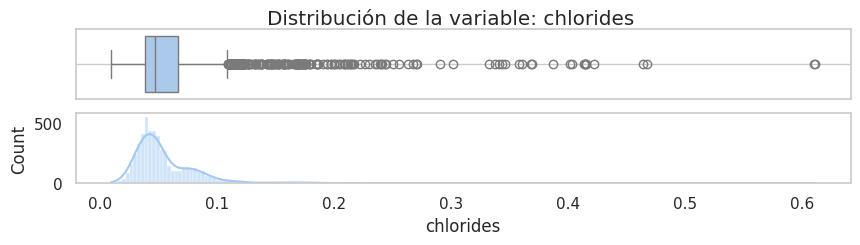

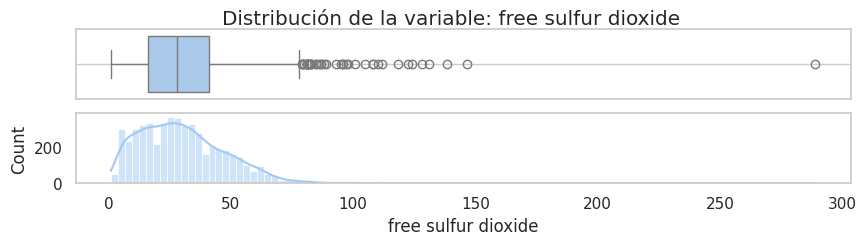

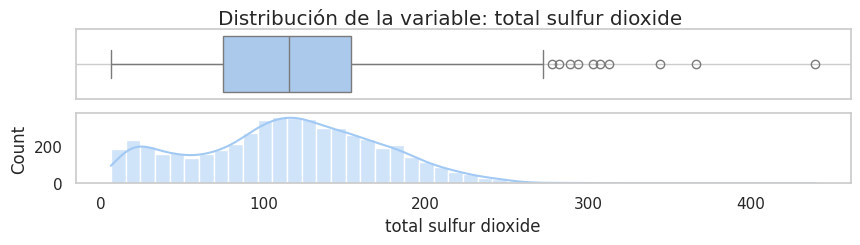

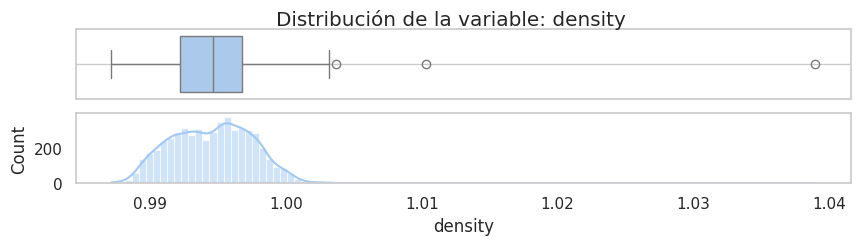

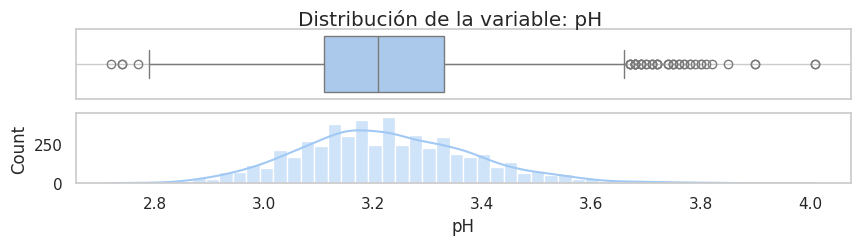

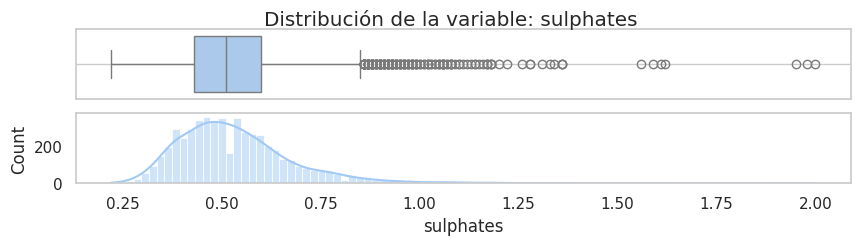

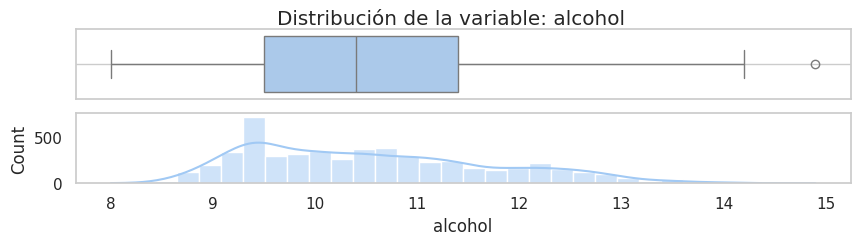

In [21]:
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(10, 2), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}')
    sns.boxplot(x=df[feature], ax=axes[0])
    sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    axes[0].grid()
    axes[1].grid()
    plt.show()

#### Si bien existen outliers para las variables bajo estudio, los mismos se encuentran dentro del dominio esperado y no serán ajustados. No obstante, se analizará con mayor detalle el caso de los outliers asociados a los niveles de azufre que están por encima de la cota máxima del boxplot.

### **Análisis de corelación**

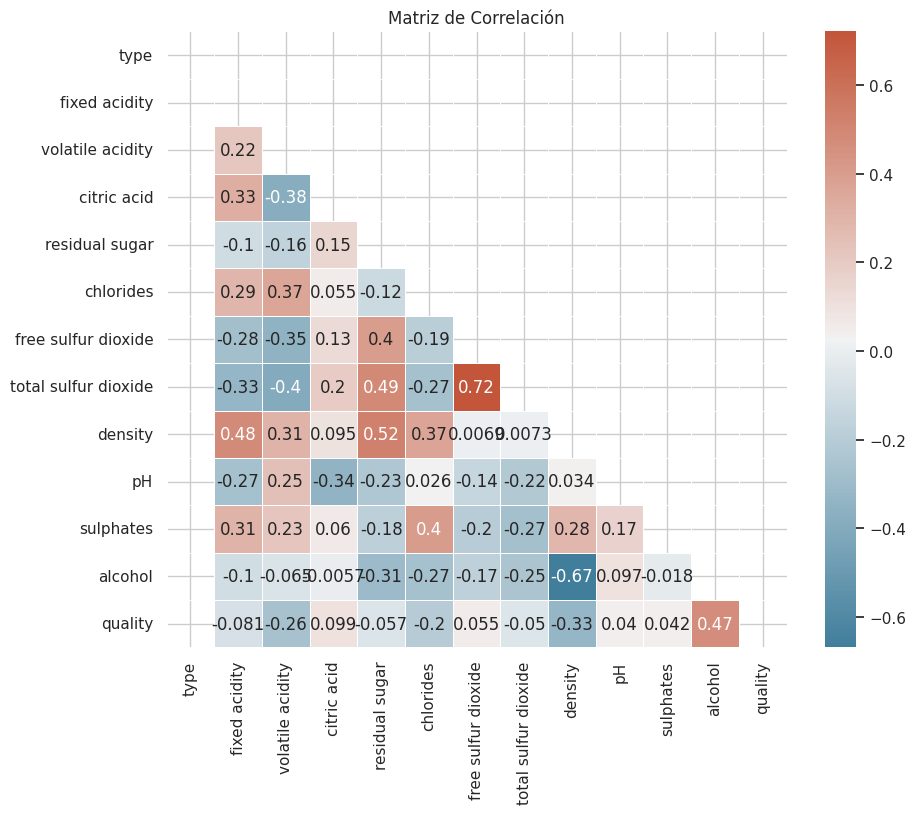

In [22]:
corr = df.corr()  # Calculo la matriz de correlación
mask = np.triu(np.ones_like(corr, dtype=bool))  #Creo una máscara para la parte superior del mapa de calor
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Defino el mapa de colores
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Se observa mayor correlación positiva entre las siguientes variables, lo cual es esperable:
* "free sulfur dioxide" y "total sulfur dioxide"
* "density" y "residual sugar"

Por su parte, hay una mayor correlación negativa entre el nivel de alcohol y la densidad del vino (lo cual también es esperable).